## Load extentions

In [1]:
%load_ext lab_black
%matplotlib inline

## Import modules

In [3]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings("ignore")

## Utils

In [4]:
def get_XY(data: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    return data.drop(["score"], axis=1), data.score


def set_seed(seed: int) -> None:
    random.seed(seed)
    np.random.seed(seed)

In [5]:
seed = 42
set_seed(seed)

## Dataset

In [6]:
categorical = ["algo", "is_win"]

In [7]:
data = pd.read_csv("../../logs/log.csv")
data

,algo,is_win,score,time
0,a_star,False,-513,9.291395
1,a_star,False,-555,19.296181
2,a_star,False,-744,48.697910
3,a_star,True,326,34.499596
4,a_star,False,-525,6.928996
...,...,...,...,...
79,keyboard,False,-511,3.691274
80,keyboard,True,278,40.352228
81,a_star,True,380,57.864921
82,expectimax,False,-507,1.093772


In [8]:
train_data, test_data = data.iloc[:-5], data.iloc[-5:]

## EDA

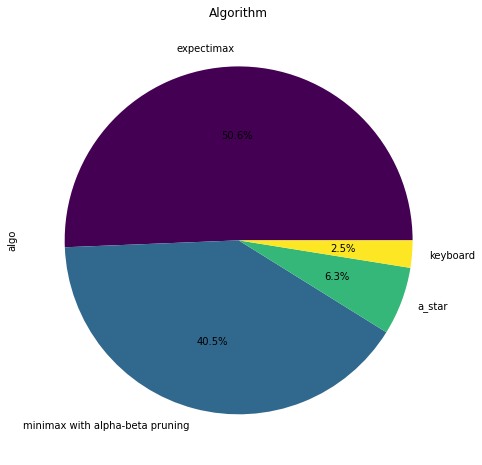

In [9]:
figure = plt.figure(figsize=(8, 8))
train_data.algo.value_counts().plot.pie(
    title="Algorithm",
    autopct="%1.1f%%",
    cmap="viridis",
)
figure.set_facecolor("white")

Text(0.5, 0.98, 'Time vs. Score')

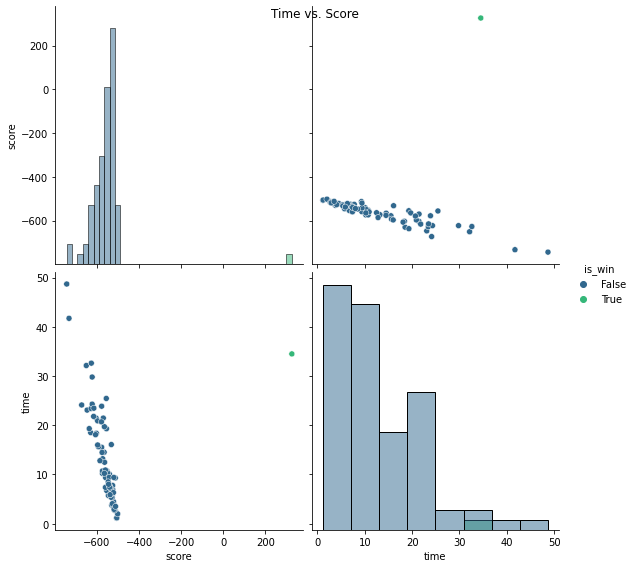

In [10]:
grid = sns.pairplot(
    train_data,
    hue="is_win",
    diag_kind="hist",
    height=4,
    palette="viridis",
)
grid.fig.suptitle("Time vs. Score", fontsize=12)

## Transform data

In [11]:
X, Y = get_XY(train_data)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=seed
)

In [12]:
encoder = OrdinalEncoder()
X_train[categorical] = encoder.fit_transform(X_train[categorical])
X_valid[categorical] = encoder.transform(X_valid[categorical])

## Visualization

In [13]:
XY_train = pd.concat([X_train, Y_train], axis=1)
tsne = TSNE(n_components=2)
train_2d = tsne.fit_transform(XY_train)

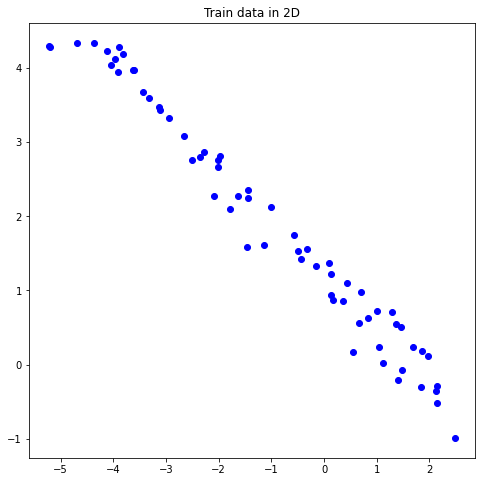

In [14]:
figure = plt.figure(figsize=(8, 8))
plt.title("Train data in 2D")
axes = np.split(train_2d, 2, axis=1)
plt.scatter(*axes, color="blue")

## Model

In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.coef_

array([ -3.15942322, 988.37968146,  -4.74590633])

In [16]:
print("R2 score:", model.score(X_valid, Y_valid))

R2 score: 0.8005986093653066


## Prediction

In [17]:
X_test, Y_test = get_XY(test_data)
X_test[categorical] = encoder.transform(X_test[categorical])

In [18]:
Y_pred = model.predict(X_test)
print("R2 score:", model.score(X_test, Y_pred))

R2 score: 1.0


## Statistics

In [19]:
stats = pd.DataFrame(
    {
        "$|Y_{true}-Y_{pred}|$": np.abs(Y_test - Y_pred),
        "$|Y_{true}-Y_{mean}|$": np.abs(Y_test - Y_train.mean()),
    }
).reset_index(drop=True)
stats

,$|Y_{true}-Y_{pred}|$,$|Y_{true}-Y_{mean}|$
0,11.485118,43.920635
1,13.905108,832.920635
2,164.889643,934.920635
3,0.001804,47.920635
4,10.055268,84.079365
